In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def runRandomWalker(iteration):
    x = 0
    for i in range(iteration):
        rand = np.random.random()
        if (rand < 0.5):
            x += 1
        else:
            x -= 1
        
    return x


def randomWalkerEnsemble(ensembleSize, iteration):
    endPoints = []
    for i in range(ensembleSize):
        endPoints.append(runRandomWalker(iteration))
        
    return endPoints

In [4]:
endPoints = randomWalkerEnsemble(1000,100)

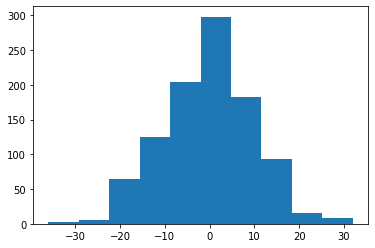

In [5]:
_ = plt.hist(endPoints, bins  = 10)

In [15]:
meanX2List = []
iterationList = []
meanList = []

for iteration in range(1,100):
    iterationList.append(iteration)
    meanX2List.append((np.array(randomWalkerEnsemble(1000,iteration))**2).mean())
    meanList.append(np.mean(randomWalkerEnsemble(1000, iteration)))

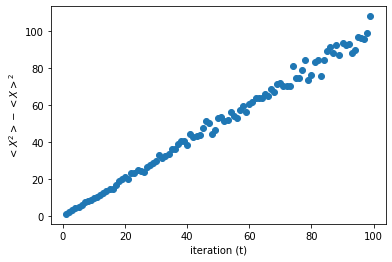

In [26]:
plt.scatter(iterationList, np.subtract(meanX2List, meanList))
plt.xlabel("iteration (t)")
_ = plt.ylabel("$<X^2>-<X>^2$")

In [45]:
a, b, a*iterationList[0]+b

(1.0087102040816327, -0.14270212327353807, 0.8660080808080947)

### Calculating the Diffusion Coefficeint

### $var(x) = <X^2> - <X>^2 = 2Dt$

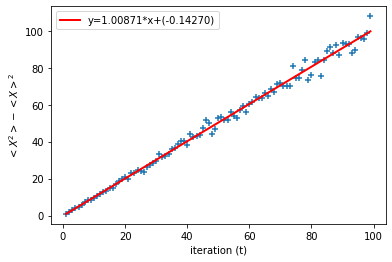

In [59]:
a,b = np.polyfit(iterationList, np.subtract(meanX2List, meanList),1)
plt.scatter(iterationList, np.subtract(meanX2List, meanList), marker='+')
plt.xlabel("iteration (t)")
_ = plt.ylabel("$<X^2>-<X>^2$")
linePoints = [(iterationList[0], iterationList[-1]), (a*iterationList[0]+b, a*iterationList[-1]+b)]
plt.plot(linePoints[0], linePoints[1], lw=2, c='r', label=f"y={a:2.5f}*x+({b:2.5f})")
plt.legend()

### So D=0.5

## We can also calcualte D using $std(x)= \sqrt{2Dt}$

since we have form $y = x^{something}$ so we should plot the data on LogLog graph 

$Y =0.5*\log(2D)+T/2$

In [76]:
stdList = np.sqrt(np.subtract(meanX2List, meanList))

Text(0, 0.5, '$Y = \\log(std(x_{endpoint}))$')

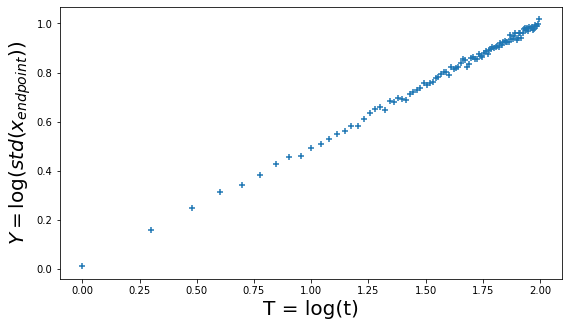

In [90]:
plt.figure(figsize=(9,5))
plt.scatter(np.log10(iterationList), np.log10(stdList), marker='+')
plt.xlabel("T = log(t)", fontsize=20)
plt.ylabel("$Y = \log(std(x_{endpoint}))$", fontsize=20)

(-2.0, 2.0)

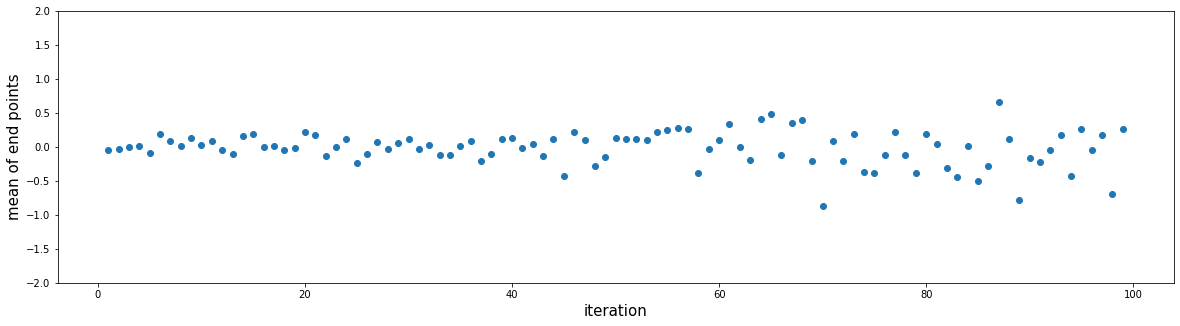

In [94]:
plt.figure(figsize=(20,5))
plt.xlabel("iteration", fontsize=15)
plt.ylabel("mean of end points", fontsize=15)
plt.scatter(iterationList, meanList)
plt.ylim([-2,2])

In [95]:
a,b = np.polyfit(np.log10(iterationList), np.log10(stdList),1)

In [96]:
y1 = a*np.log10(iterationList[0]) + b
y2 = a*np.log10(iterationList[-1]) + b
Y = [y1,y2]
X = [np.log10(iterationList[0]),np.log10(iterationList[-1])]

Text(0, 0.5, 'log(std) of the end point')

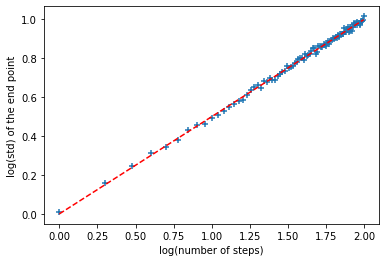

In [97]:
plt.scatter(np.log10(iterationList), np.log10(stdList), marker='+')
plt.plot(X,Y,'r--')
plt.xlabel("log(number of steps)")
plt.ylabel("log(std) of the end point")

## So D will be equal to : 

$b = 0.5\log(2D)$

$ D = 0.5*{10^{2b}}$

In [69]:
10**(2*b)/2

0.49791417769901675